# Explanatory Analysis of GoBike Dataset

## Overarching Question

The guiding question for this explanatory analysis is: How do different user types, age groups, and gender demographics affect bike-sharing usage patterns, including ride duration and frequency across the week? By exploring these aspects, the analysis aims to uncover patterns that can be leveraged for improving the GoBike service and enhancing the user experience.


## Dataset Context

The dataset analyzed is sourced from the GoBike bike-sharing program. It includes trip information such as ride duration, start and end stations, as well as user demographics like gender, age, and user type (Subscriber or Customer). By analyzing these features, we gain insights into different usage behaviors, including identifying trends in ride duration, determining peak usage times, and uncovering preferences across different user demographics.


In [32]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

df_gobike = pd.read_csv('201902_gobike_master.csv', parse_dates=['start_time', 'end_time'])

## Key Findings and Insights

### 1. Ride Distribution by User Type and Gender

To understand how gender and user type influence ride distribution, we analyzed the percentage of user types by gender. The analysis shows that Subscribers make up the majority of users for both male and female riders. The following bar chart demonstrates that male Subscribers account for approximately 60% of total rides, while female Subscribers also form a significant part of the user base. Customers, however, are more evenly distributed between genders, with a slightly higher presence during weekends, suggesting occasional leisure use.

*Visualization 1: Percentage of User Types by Gender*

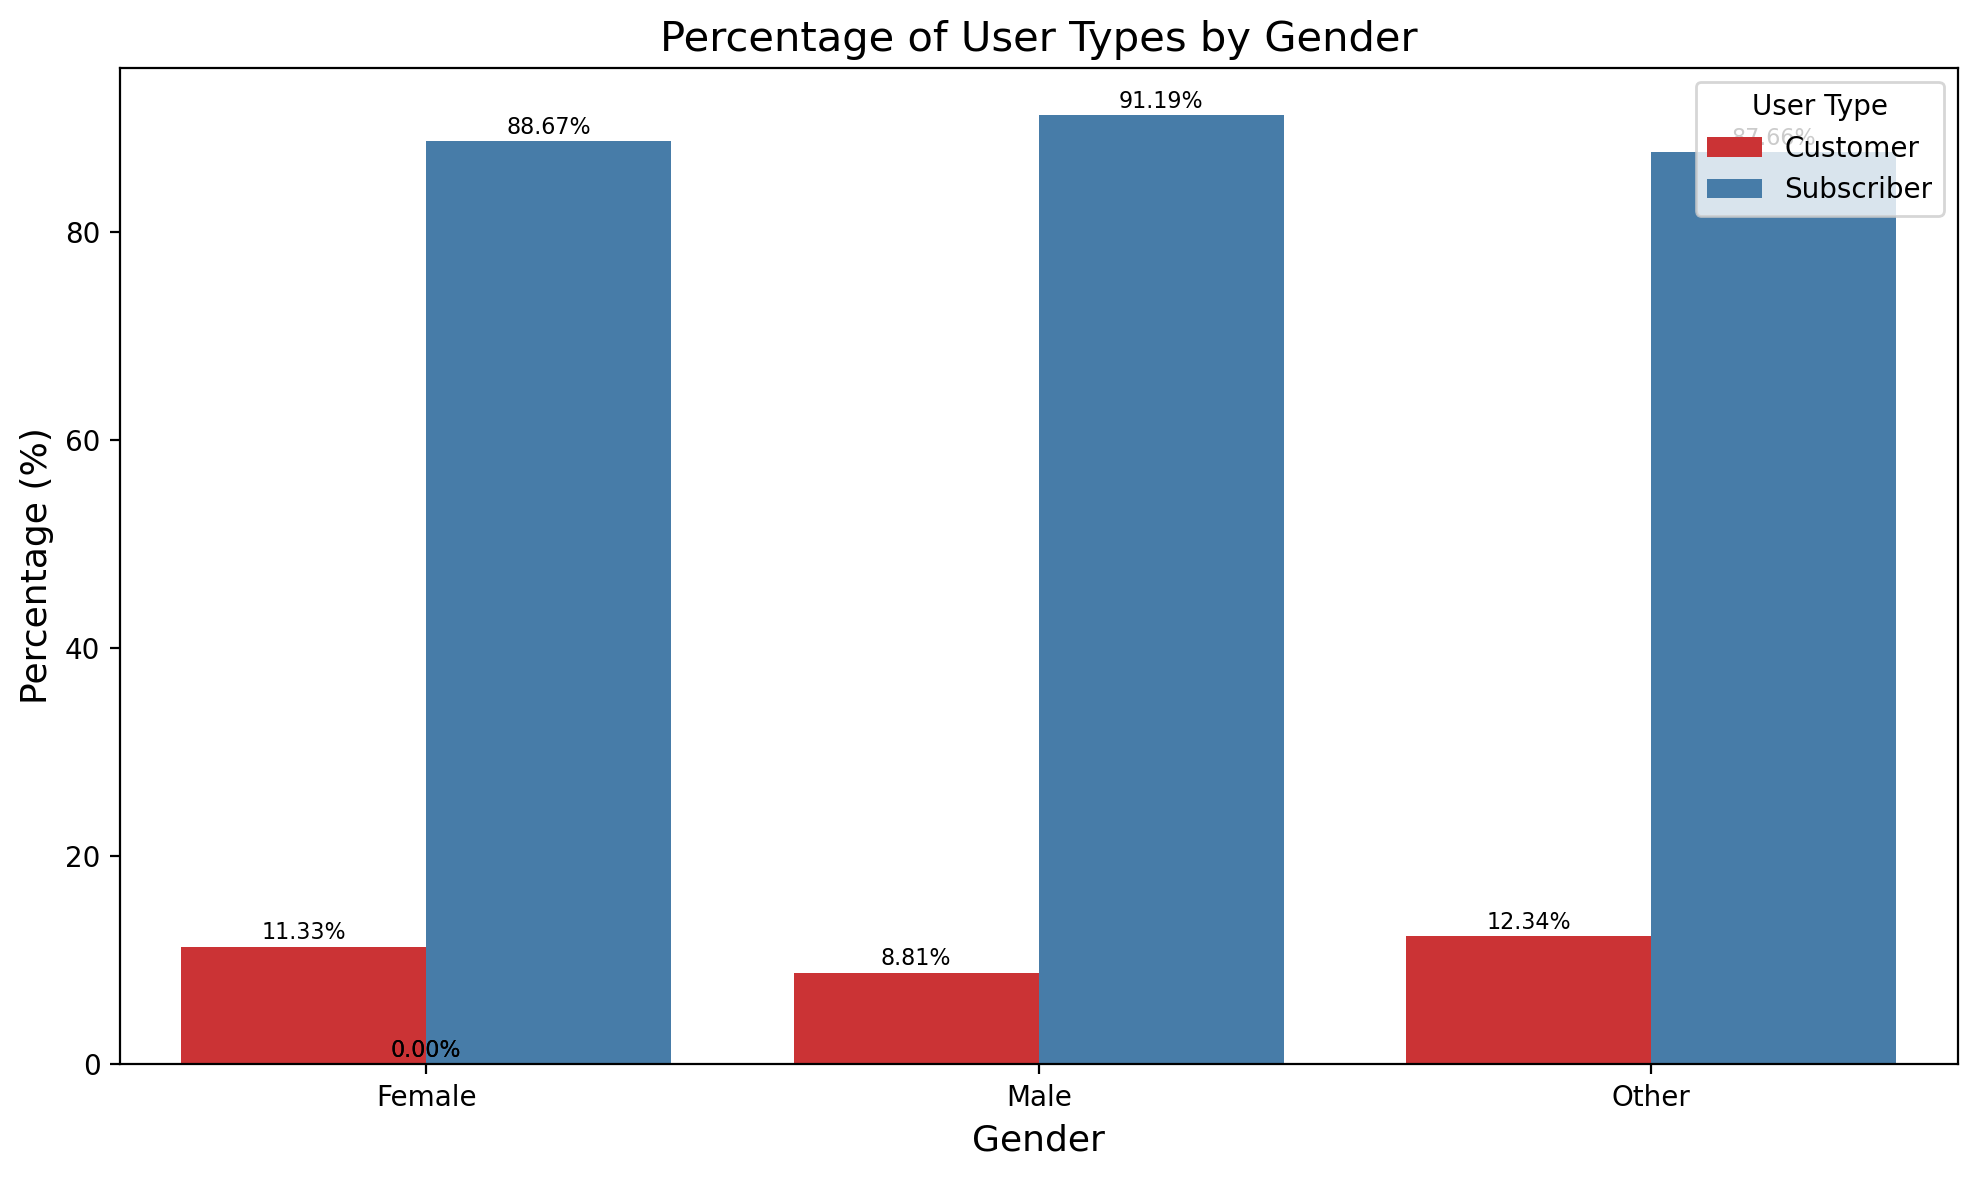

In [33]:
# Calculate the percentage of user types by member gender
user_type_percentage = df_gobike.groupby(['member_gender', 'user_type']).size().reset_index(name='count')
user_type_percentage['percentage'] = (user_type_percentage['count'] / user_type_percentage.groupby('member_gender')['count'].transform('sum')) * 100

# Plotting the percentage of user types by gender
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(data=user_type_percentage, x='member_gender', y='percentage', hue='user_type', ax=ax, palette='Set1')
ax.set_ylabel('Percentage (%)', fontsize=13)
ax.set_xlabel('Gender', fontsize=13)
ax.set_title('Percentage of User Types by Gender', fontsize=15)

# Adding value labels on bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=8, color='black', xytext=(0, 5), textcoords='offset points')

ax.legend(title='User Type', loc='upper right')
plt.tight_layout()
plt.show()

The bar chart shows that Subscribers dominate the user base, with a larger percentage of male riders. Female riders also exhibit a preference for subscribing, albeit at a slightly lower percentage. This insight suggests that regular, frequent users prefer the subscription model, whereas casual users are more likely to be Customers.

### 2. Average Trip Duration by User Type and Age Group

To explore ride duration patterns, we analyzed the average trip duration by age group and user type. The facet plot below highlights that Customers tend to have longer average ride durations compared to Subscribers, especially for younger age groups. Notably, Customers aged 20-25 have the longest average ride durations, around 25 minutes, whereas Subscribers generally take shorter, more consistent trips, averaging 12-15 minutes.

*Visualization 2: Average Trip Duration by Age Group and User Type*

C:\Users\pccra\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
C:\Users\pccra\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)


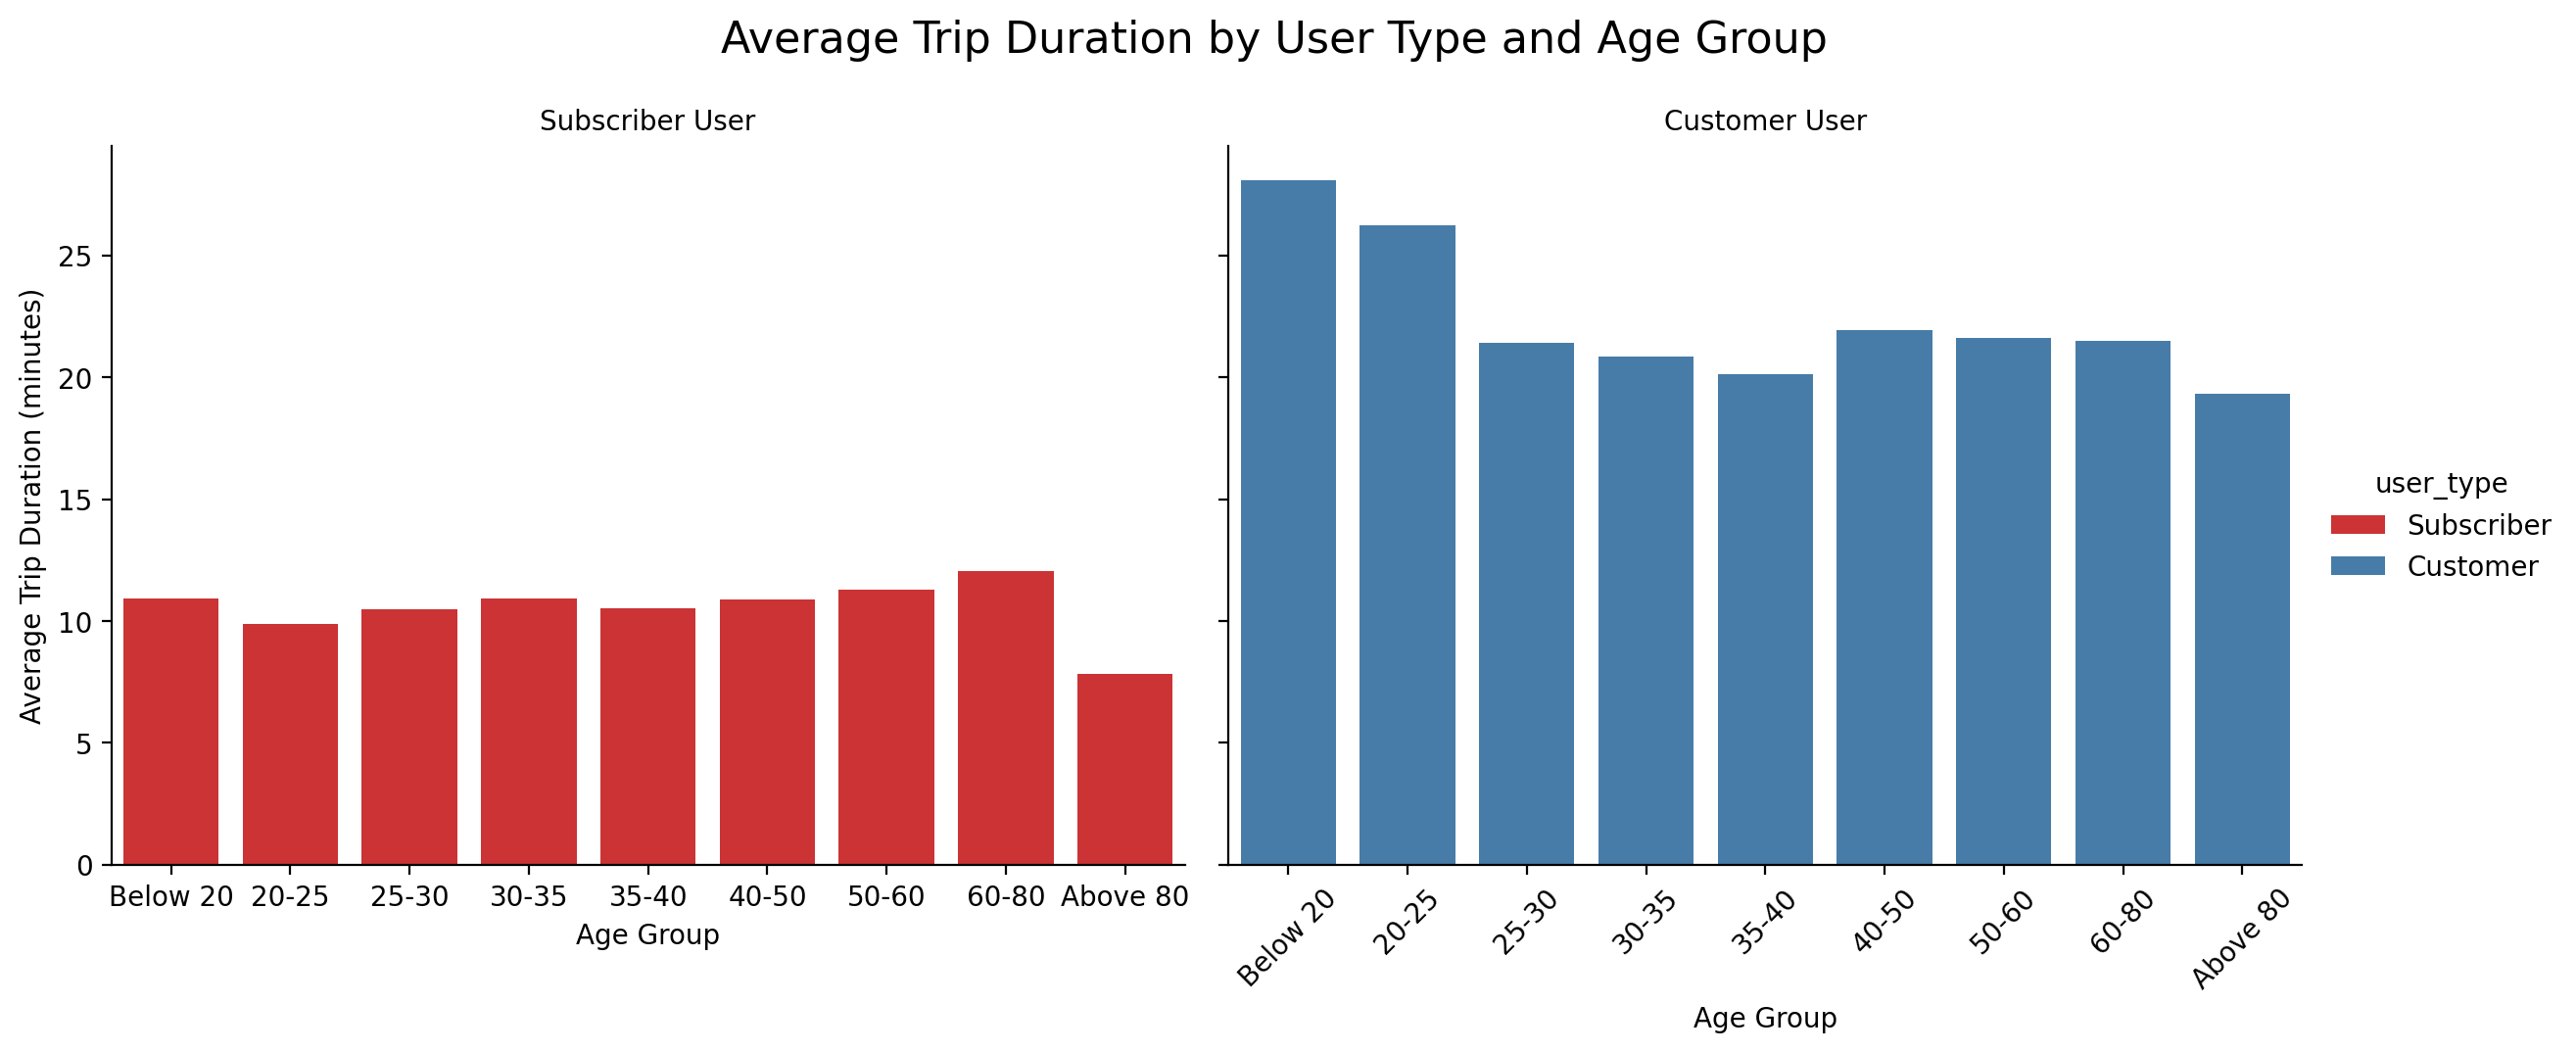

In [34]:
# Define age bins and labels
min_age = df_gobike['member_age'].min()
max_age = df_gobike['member_age'].max()
bins = [min_age, 20, 25, 30, 35, 40, 50, 60, 80, max_age]
labels = ["Below 20", "20-25", "25-30", "30-35", "35-40", "40-50", "50-60", "60-80", "Above 80"]


# Create age groups
df_gobike['age_group'] = pd.cut(df_gobike['member_age'], bins=bins, right=False, labels=labels)

# Define the order of age groups for consistent plotting
age_group_order = ["Below 20", "20-25", "25-30", "30-35", "35-40", "40-50", "50-60", "60-80", "Above 80"]

# Create a facet grid to visualize average trip duration by user type and age group
g = sns.FacetGrid(df_gobike, col='user_type', hue='user_type', palette='Set1', height=5, aspect=1.2, col_order=['Subscriber', 'Customer'])
g.map(sns.barplot, 'age_group', 'duration_min', order=age_group_order, ci=None)
g.add_legend()

# Set axis labels and titles
g.set_axis_labels('Age Group', 'Average Trip Duration (minutes)')
g.set_titles(col_template='{col_name} User')
plt.subplots_adjust(top=0.85)
g.fig.suptitle('Average Trip Duration by User Type and Age Group', fontsize=16)
plt.xticks(rotation=45)
plt.show()

The facet plot shows that Customers aged 20-25 take the longest rides, suggesting that they might use the service more for recreational purposes, while Subscribers seem to use the service primarily for commuting, leading to shorter and more consistent trip durations across all age groups.

### 3. Ride Activity by Day of the Week

To determine when the GoBike service is most used, we analyzed ride frequency by day of the week and also compared user type distributions across these days. The bar chart below demonstrates that weekday usage is significantly higher compared to weekends, with Tuesday and Wednesday having the highest ride counts. Subscribers dominate usage during the weekdays, which suggests that they may be using the service for commuting purposes. Customers, however, have a more notable presence during weekends, indicating leisure-oriented use.

*Visualization 3: Total Number of Rides per Day of the Week*

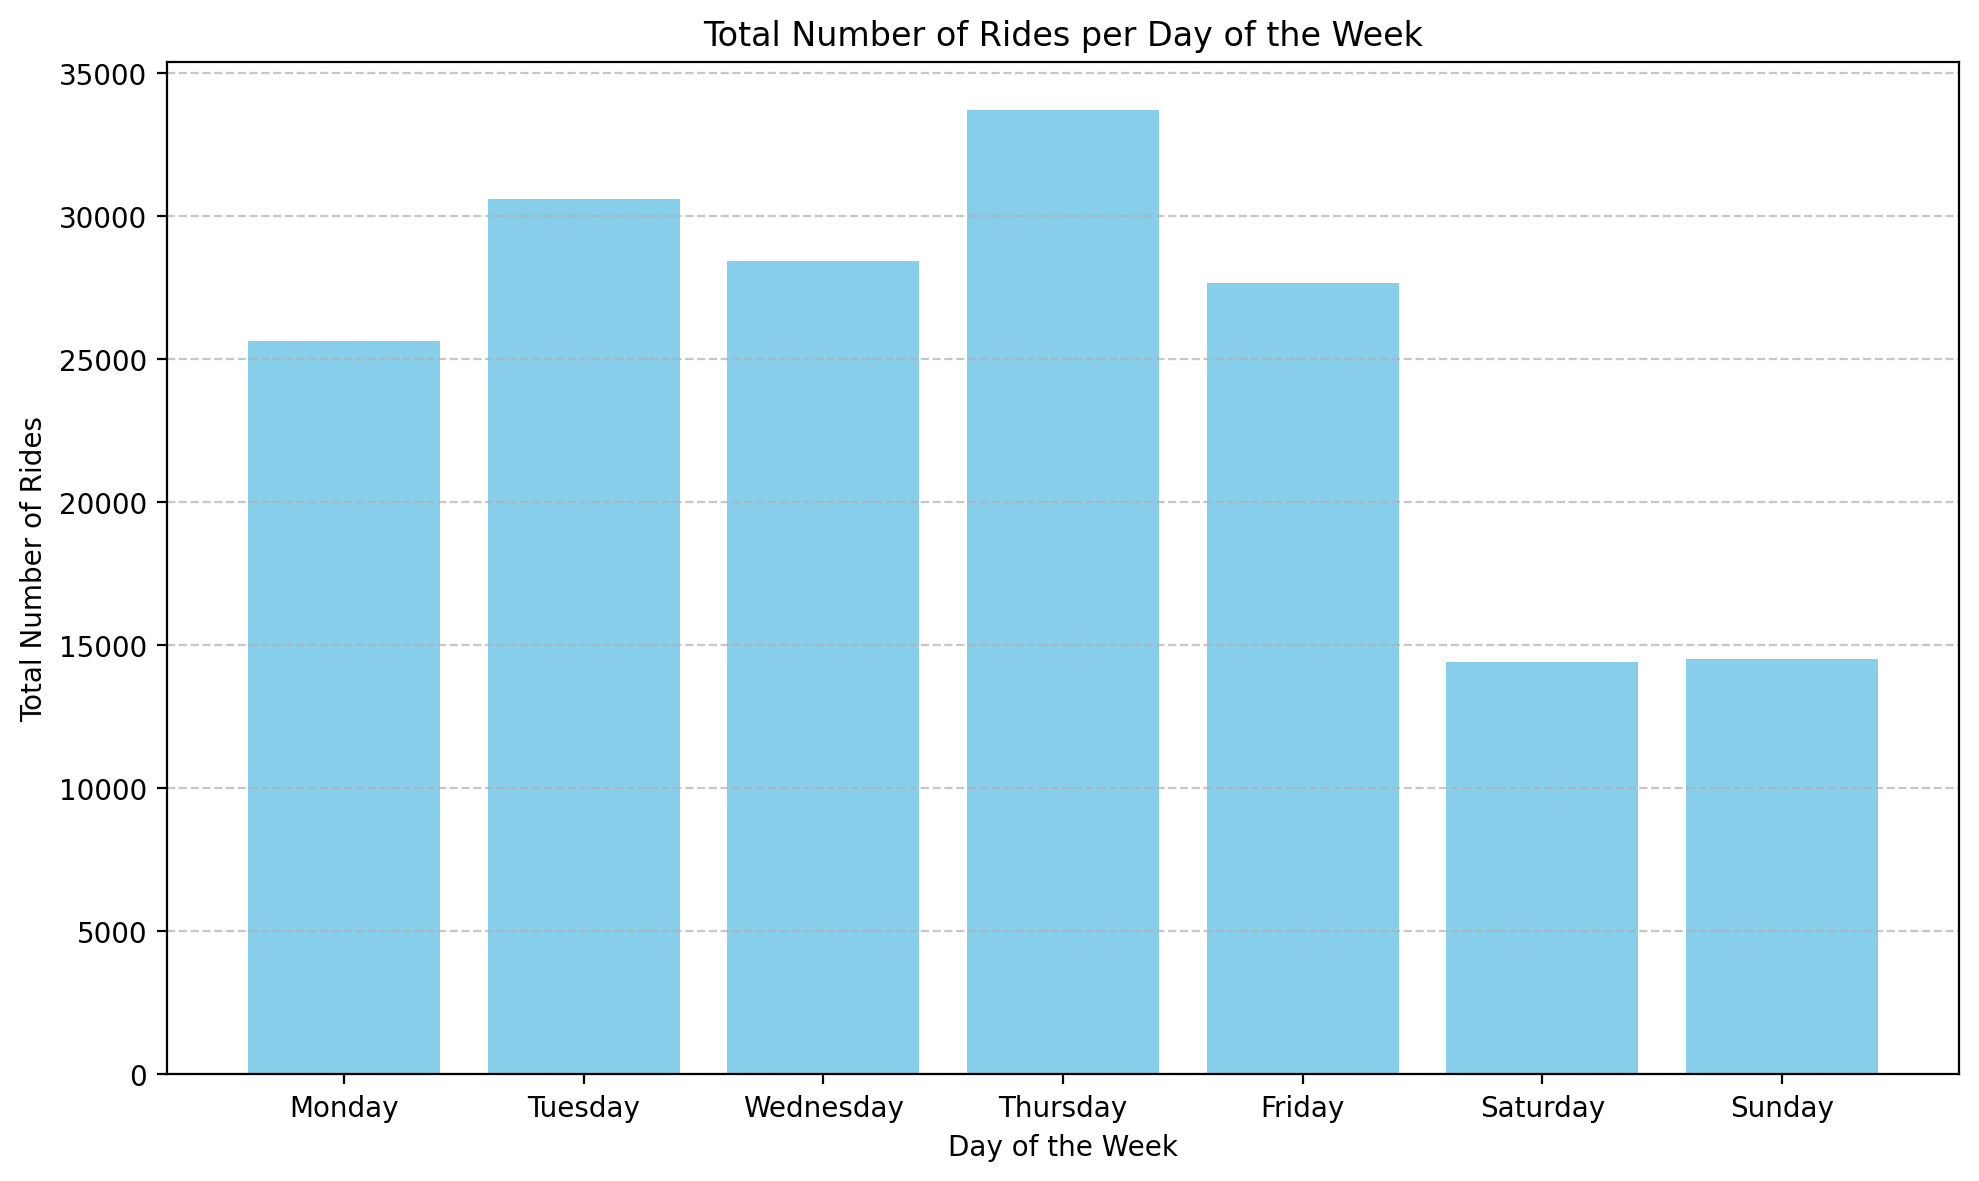

In [35]:
# Convert 'start_time' to datetime format and extract day of the week
df_gobike['day_of_week'] = df_gobike['start_time'].dt.day_name()

# Calculate total number of rides per day of the week using 'bike_id'
total_rides = df_gobike.groupby('day_of_week')['bike_id'].count().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Plotting the total number of rides per day of the week
plt.figure(figsize=(10, 6))
plt.bar(total_rides.index, total_rides.values, color='skyblue')
plt.title('Total Number of Rides per Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Number of Rides')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

The bar chart reveals that ride activity peaks during weekdays, particularly on Tuesday and Wednesday, while weekends see a drop in usage. This trend indicates that Subscribers are likely using the service for regular commuting, while weekends attract more Customers, possibly for leisure activities.

*Visualization 4: Percentage of User Types by Start Day of the Week*

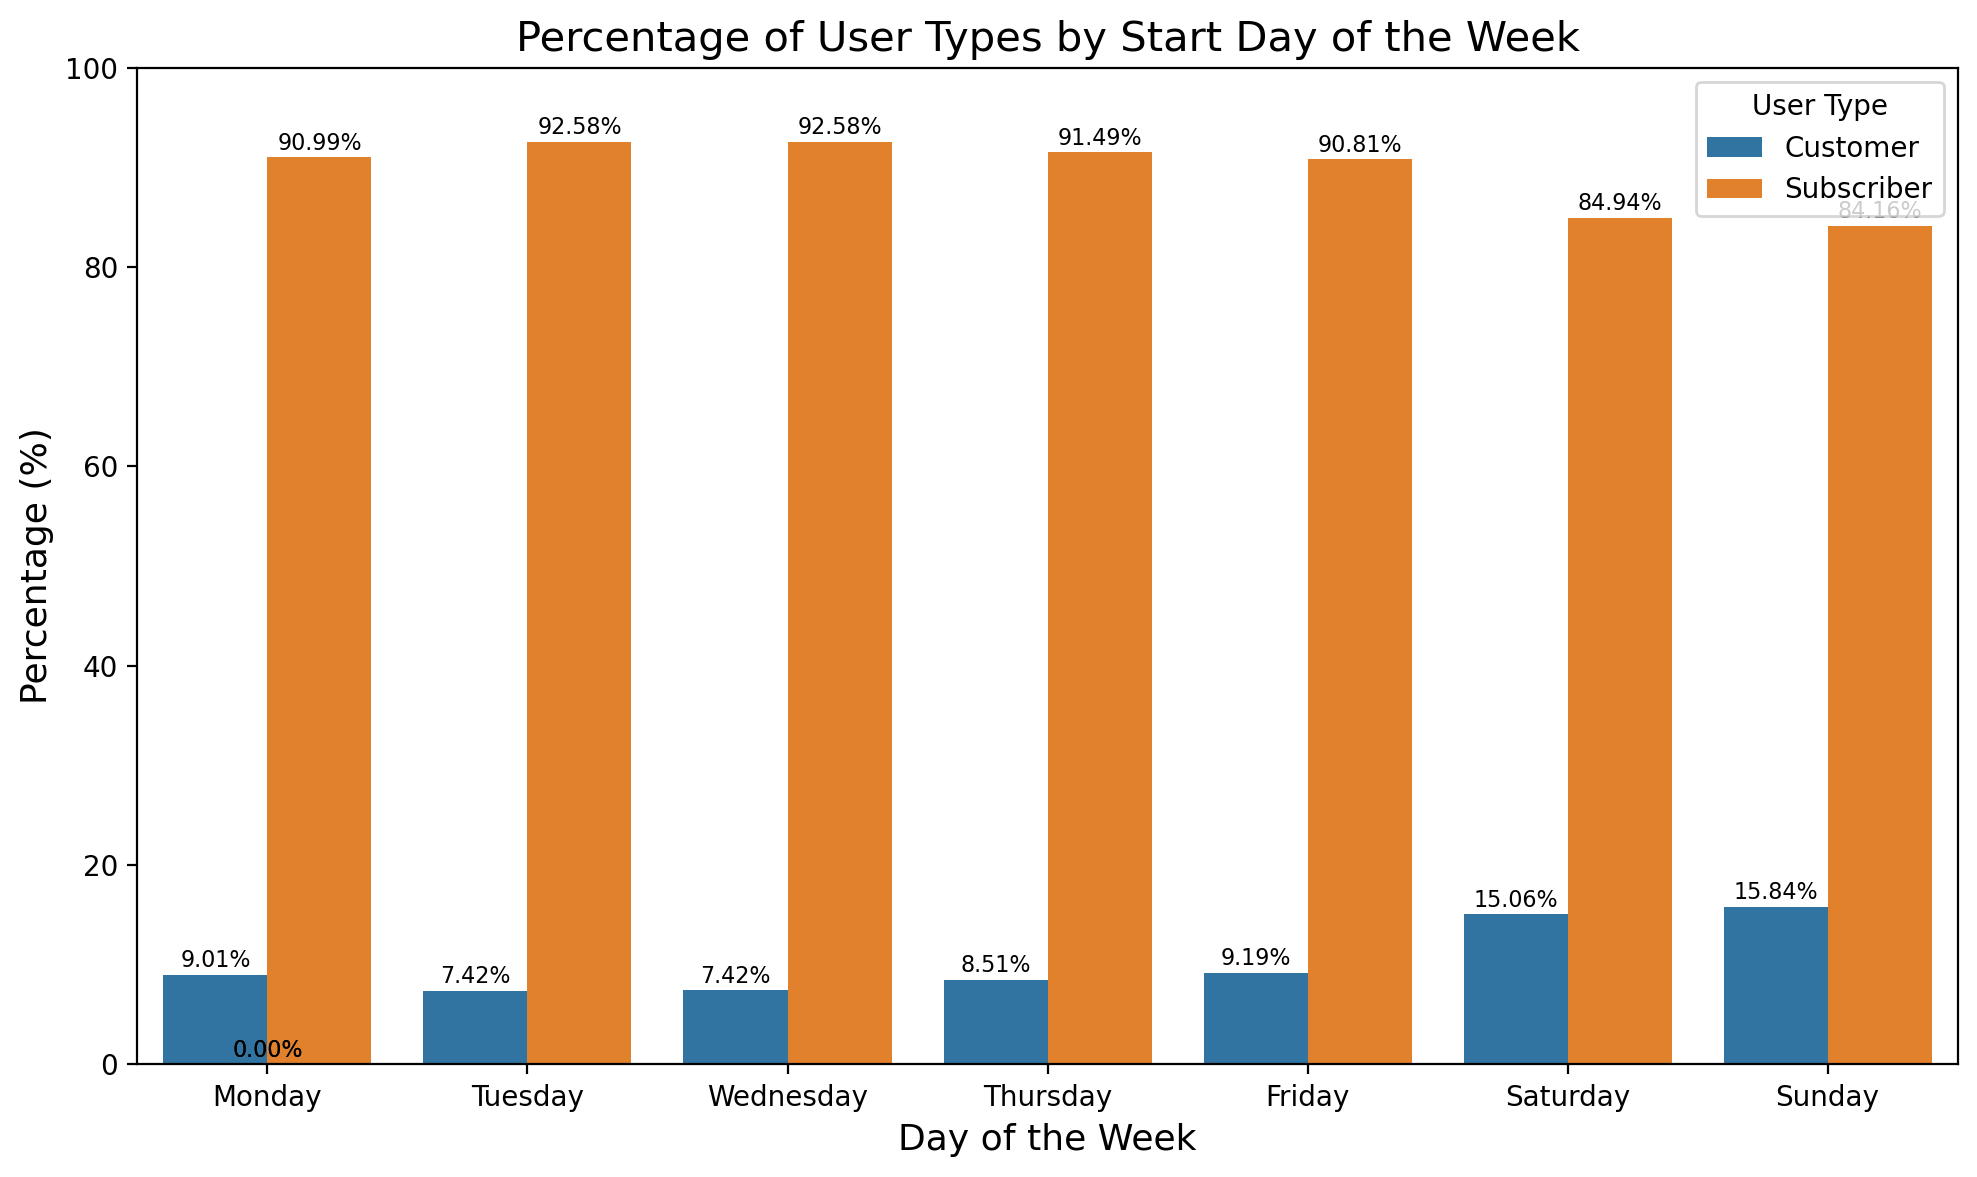

In [36]:
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Calculate the percentage of user types by start day of the week
user_type_percentage_by_day = df_gobike.groupby(['day_of_week', 'user_type']).size().reset_index(name='count')
user_type_percentage_by_day['percentage'] = (user_type_percentage_by_day['count'] / user_type_percentage_by_day.groupby('day_of_week')['count'].transform('sum')) * 100

# Plotting the percentage of user types by start day of the week
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(data=user_type_percentage_by_day, x='day_of_week', y='percentage', hue='user_type', order=days_order, ax=ax)
ax.set_ylabel('Percentage (%)', fontsize=13)
ax.set_xlabel('Day of the Week', fontsize=13)
ax.set_ylim(0, 100)
ax.set_title('Percentage of User Types by Start Day of the Week', fontsize=15)

# Adding value labels on bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=8, color='black', xytext=(0, 5), textcoords='offset points')

ax.legend(title='User Type', loc='upper right')
plt.tight_layout()
plt.show()

The percentage of user types per day of the week confirms that Subscribers have a higher representation on weekdays, while Customers' usage increases slightly over the weekend. This supports the earlier findings that Subscribers mainly use the service for commuting during the workweek, whereas Customers might be using it more for leisurely activities.

## Conclusions

The explanatory analysis highlights distinct trends in the GoBike dataset, illustrating differences in ride behavior based on user type, age, and gender. Visualizations effectively support these findings, showing that Subscribers are more frequent, weekday users, likely for commuting, while Customers tend to take longer rides, especially on weekends. The insights provided by these analyses can be valuable for improving service offerings, optimizing bike availability, and targeting specific user groups with tailored marketing strategies.

